In [25]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()  

In [26]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
df['target'] = iris.target 
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [32]:
df['flower_name'] =  df.target.apply(lambda x: iris.target_names[x] )
df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
df0 = df[df.target == 0]
df1 = df[df['target'] == 1]
df2 = df[df.target == 2]

In [35]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0, 0.5, 'sepal width (cm)')

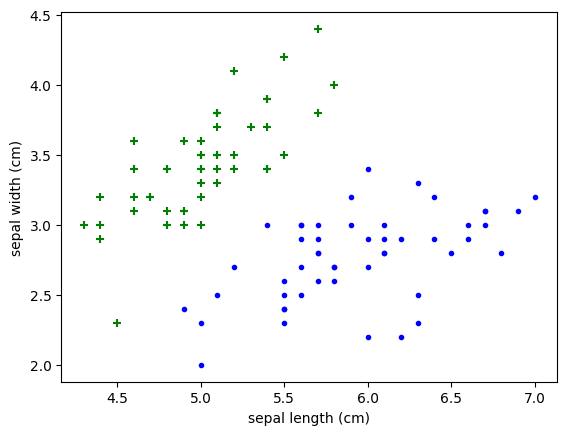

In [36]:
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] , color='green' , marker='+')
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] , color='blue' , marker='.')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'sepal width (cm)')

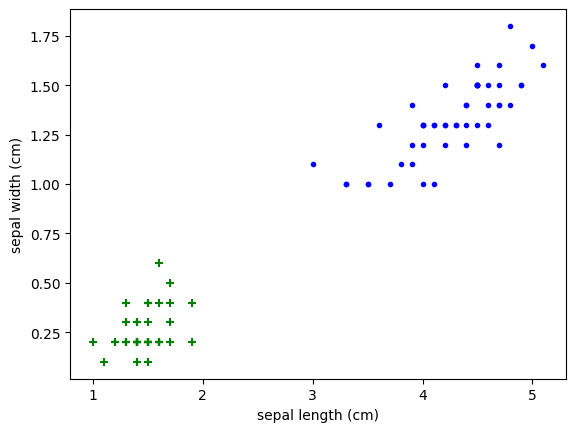

In [37]:
plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color='green' , marker='+')
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color='blue' , marker='.')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(['target' , 'flower_name'] , axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [41]:
X_train , X_test , y_train ,y_test = train_test_split(X , y ,test_size=0.2)

In [42]:
len(X_train)

120

In [43]:
len(X_test)

30

create KNN(k nearest neighbour Classifie)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test,y_test)

0.9666666666666667

In [47]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

